# Navigation

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the first project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893).

### 1. Start the Environment

We begin by importing some necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
import pathlib

from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Banana.app"`
- **Windows** (x86): `"path/to/Banana_Windows_x86/Banana.exe"`
- **Windows** (x86_64): `"path/to/Banana_Windows_x86_64/Banana.exe"`
- **Linux** (x86): `"path/to/Banana_Linux/Banana.x86"`
- **Linux** (x86_64): `"path/to/Banana_Linux/Banana.x86_64"`
- **Linux** (x86, headless): `"path/to/Banana_Linux_NoVis/Banana.x86"`
- **Linux** (x86_64, headless): `"path/to/Banana_Linux_NoVis/Banana.x86_64"`

For instance, if you are using a Mac, then you downloaded `Banana.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Banana.app")
```

In [2]:
_file = pathlib.Path("../environments/Banana.app")

In [5]:
_file.as_posix?

Signature: _file.as_posix()
Docstring:
Return the string representation of the path with forward (/)
slashes.
File:      ~/Training/udacity/udacity-drlnd-projects/env/lib/python3.6/pathlib.py
Type:      method


In [4]:
env = UnityEnvironment(file_name=_file.as_posix())

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

The simulation contains a single agent that navigates a large environment.  At each time step, it has four actions at its disposal:
- `0` - walk forward 
- `1` - walk backward
- `2` - turn left
- `3` - turn right

The state space has `37` dimensions and contains the agent's velocity, along with ray-based perception of objects around agent's forward direction.  A reward of `+1` is provided for collecting a yellow banana, and a reward of `-1` is provided for collecting a blue banana. 

Run the code cell below to print some information about the environment.

In [4]:
import os
import sys

sys.path.append(os.path.abspath('../src/'))

In [5]:
import agents

In [12]:
!pip install gym-unity

  Using cached gym_unity-0.15.1-py3-none-any.whl (7.5 kB)
  Using cached mlagents_envs-0.15.1-py3-none-any.whl (54 kB)
     |████████████████████████████████| 1.3 MB 362 kB/s eta 0:00:01
ERROR: unityagents 0.4.0 has requirement protobuf==3.5.2, but you'll have protobuf 3.11.3 which is incompatible.
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.5.2
    Uninstalling protobuf-3.5.2:
      Successfully uninstalled protobuf-3.5.2


In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [1.         0.         0.         0.         0.84408134 0.
 0.         1.         0.         0.0748472  0.         1.
 0.         0.         0.25755    1.         0.         0.
 0.         0.74177343 0.         1.         0.         0.
 0.25854847 0.         0.         1.         0.         0.09355672
 0.         1.         0.         0.         0.31969345 0.
 0.        ]
States have length: 37


In [6]:
state.dtype

dtype('float64')

### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action (uniformly) at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [7]:
env_info = env.reset(train_mode=False)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0                                          # initialize the score
while True:
    action = np.random.randint(action_size)        # select an action
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    if done:                                       # exit loop if episode finished
        break
    
print("Score: {}".format(score))

Score: 0.0


When finished, you can close the environment.

In [8]:
env.close()

### 4. It's Your Turn!

In [11]:
import sys
import typing

sys.path.append("../src")

In [12]:
import numpy as np
import torch
from torch import nn, optim
from unityagents import UnityEnvironment

import agents
import replay_buffers
import utils

In [13]:
ENV = UnityEnvironment(file_name="../environments/Banana.app")

BRAIN_NAME = ENV.brain_names[0]
BRAIN = ENV.brains[BRAIN_NAME]

NUMBER_STATES = BRAIN.vector_observation_space_size
NUMBER_ACTIONS = BRAIN.vector_action_space_size

SEED = 42
RANDOM_STATE = np.random.RandomState(SEED)

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [14]:
def beta_annealing_schedule(episode_number: int,
                            initial_beta: float,
                            rate: float) -> float:
    """Annealing schedule the strength of correction used with prioritized sampling."""
    return initial_beta + (1 - initial_beta) * (1 - np.exp(-rate * episode_number))


def make_beta_annealing_schedule(rate: float) -> replay_buffers.BetaAnnealingSchedule:
    """Create a function that returns the value for beta."""
    return lambda n, b: beta_annealing_schedule(n, b, rate)


def epsilon_decay_schedule(episode_number: int,
                           decay_factor: float,
                           minimum_epsilon: float) -> float:
    """Decay schedule for the probability that agent chooses an action at random."""
    return max(decay_factor**episode_number, minimum_epsilon)


def make_epsilon_decay_schedule(decay_factor: float,
                                minimum_epsilon: float) -> agents.EpsilonDecaySchedule:
    """Create a function that returns the value for epsilon."""
    return lambda n: epsilon_decay_schedule(n, decay_factor, minimum_epsilon)


def make_deep_q_network_fn(number_states: int,
                           number_actions: int,
                           number_hidden_units: int) -> agents.DeepQNetworkFn:
    """Create a function that returns a DeepQNetwork with appropriate input and output shapes."""
    
    def deep_q_network_fn() -> agents.DeepQNetwork:
        deep_q_network = nn.Sequential(
            nn.Linear(in_features=number_states, out_features=number_hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=number_hidden_units, out_features=number_hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=number_hidden_units, out_features=number_actions)
        )
        return deep_q_network
    
    return deep_q_network_fn


def preprocessing_fn(state: agents.UnityState) -> torch.Tensor:
    """Maps external env state repr to agent's internal env state repr."""
    tensor = (torch.Tensor(state)
                   .unsqueeze(dim=0))
    return tensor
            

In [15]:
_beta_annealing_schedule_kwargs = {
    "rate": 1e-2
}

_replay_buffer_kwargs = {
    "maximum_size": 100000,
    "alpha": 0.5,
    "beta_annealing_schedule": make_beta_annealing_schedule(**_beta_annealing_schedule_kwargs),
    "initial_beta": 0.0,
    "random_state": RANDOM_STATE,
}
buffer = replay_buffers.PrioritizedExperienceReplayBuffer(**_replay_buffer_kwargs)

_deep_q_network_kwargs = {
    "number_states": NUMBER_STATES,
    "number_actions": NUMBER_ACTIONS,
    "number_hidden_units": 64
}
deep_q_network_fn = make_deep_q_network_fn(**_deep_q_network_kwargs)

In [16]:
_optimizer_kwargs = {
    "lr": 1e-3,
    "betas":(0.9, 0.999),
    "eps": 1e-08,
    "weight_decay": 0,
    "amsgrad": False,
}

_epsilon_decay_schedule_kwargs = {
    "decay_factor": 0.99,
    "minimum_epsilon": 1e-2,
}

_agent_kwargs = {
    "number_actions": NUMBER_ACTIONS, 
    "optimizer_kwargs": _optimizer_kwargs,
    "preprocessing_fn": preprocessing_fn,
    "replay_buffer": buffer,
    "deep_q_network_fn": deep_q_network_fn,
    "epsilon_decay_schedule": make_epsilon_decay_schedule(**_epsilon_decay_schedule_kwargs),
    "batch_size": 64,
    "gamma": 0.95,
    "update_frequency": 4,
    "seed": RANDOM_STATE.randint(SEED),
}
double_dqn_agent = agents.DeepQAgent(**_agent_kwargs)


In [17]:
scores = utils.train(double_dqn_agent,
                     ENV,
                     BRAIN_NAME,
                     "top-score-checkpoint.pth",
                     number_episodes=2000,
                     target_score=13)


Episode 100	Average Score: 0.31
Episode 200	Average Score: 0.49
Episode 300	Average Score: 0.67
Episode 400	Average Score: 0.72
Episode 500	Average Score: 6.30
Episode 600	Average Score: 5.98
Episode 700	Average Score: 7.26
Episode 800	Average Score: 9.02
Episode 900	Average Score: 11.13

Environment solved in 976 episodes!	Average Score: 13.12


#### Plotting the time series of scores

I can use [Pandas](https://pandas.pydata.org/) to quickly plot the time series of scores along with a 100 episode moving average.

In [24]:
import matplotlib.pyplot as plt
import pandas as pd

scores_df = pd.Series(scores, name="Scores")

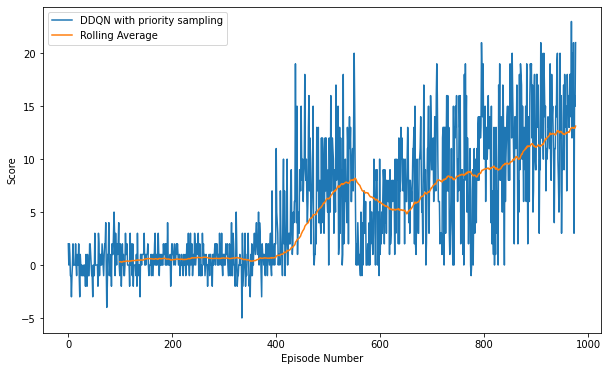

In [27]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
_ = scores_df.plot(ax=ax, label="DDQN with priority sampling")
_ = (scores_df.rolling(window=100)
              .mean()
              .rename("Rolling Average")
              .plot(ax=ax))
_ = ax.legend()
_ = ax.set_ylabel("Score")
_ = ax.set_xlabel("Episode Number")
fig.savefig("../assets/rewards-plot.jpg")

#### Kernel density plot of the scores

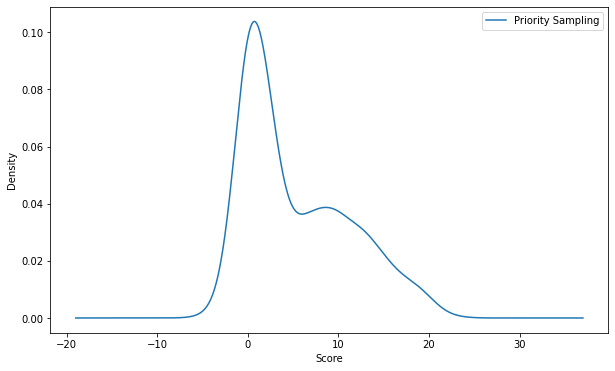

In [29]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
_ = scores_df.plot(kind="kde", ax=ax, label="Priority Sampling")
_ = ax.set_xlabel("Score")
_ = ax.legend()